In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
irisDS = pd.read_csv("iris.csv")
irisDS.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA


## Data Exploration

### Plot Data

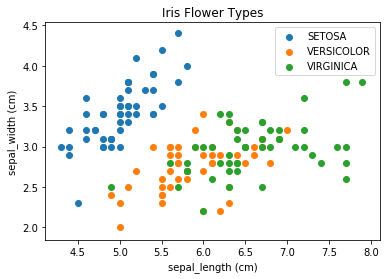

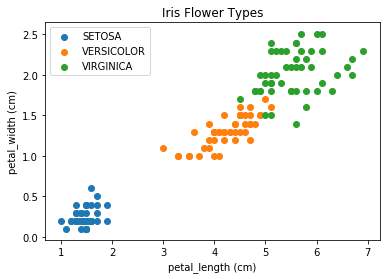

In [7]:
# List of iris flower types we will look to classify
target_features = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Parameters chosen to run analysis on
x_axis = ["sepal_length", "petal_length"]
y_axis = ["sepal_width", "petal_width"]

def visualize_data(x_axis, y_axis, target_features):
    # Plot for each type of iris flower
    for iris_type in target_features:
        plt.scatter(
            irisDS[x_axis][irisDS['class'] == iris_type], # X
            irisDS[y_axis][irisDS['class'] == iris_type], # Y
            label = iris_type
        )

    plt.title("Iris Flower Types")
    plt.xlabel(x_axis + " (cm)")
    plt.ylabel(y_axis + " (cm)")
    plt.legend()
    plt.show()

# Compare how both combinations of features fair in terms of comparision
for i in range(len(x_axis)):
    visualize_data(x_axis[i], y_axis[i], target_features)

## Data Pre-processing

### Missing / NULL values

In [8]:
#There are no fields with missing data
irisDS.isnull().count()
irisDS.isna().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
class           150
dtype: int64

### Data Conversion

In [9]:
# Convert Class (categorical data) to numerical data
# 'SETOSA' = 0
# 'VERSICOLOR' = 1
# 'VIRGINICA' = 2

irisDS["target"] = pd.factorize(irisDS["class"])[0]
irisDS["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

## Training / Testing

In [10]:
# Split data

X = irisDS.iloc[:, 2:4]
y = irisDS.iloc[:, 5:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape -> {}".format(X_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(X_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (120, 2)
y_train shape -> (120, 1)
X_test shape -> (30, 2)
y_test shape -> (30, 1)


### Normalize / Scale Data

In [11]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [12]:
# Train / fit

log_reg = LogisticRegression(solver='lbfgs', multi_class="multinomial")
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Results

In [13]:
print("Training subset accuracy: {}".format(log_reg.score(X_train, y_train)))
print("Testing subset accuracy: {}".format(log_reg.score(X_test, y_test)))

Training subset accuracy: 0.9583333333333334
Testing subset accuracy: 1.0


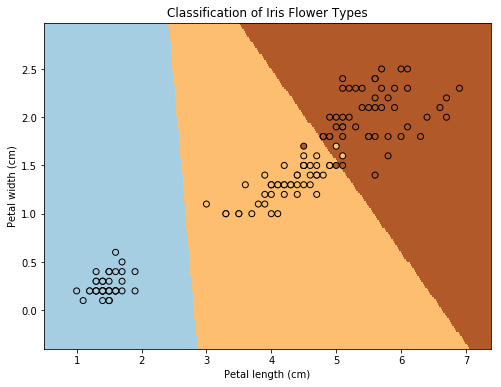

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values.ravel(), edgecolors='k', cmap=plt.cm.Paired)
plt.title("Classification of Iris Flower Types")
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()